In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://data.ny.gov/resource/62eq-hqts.csv'
response = requests.get(url)

# Check response
# if response.status_code == 200:
#     # data is in response.text
#     print(response.text)
# else:
#     print('Failed to retrieve data:', response.status_code)

df = pd.read_csv(url)
df.head()

,bfy,grant,fund_cd,dept_cd,dept_nm,unit_cd,unit_nm,obj_cd,obj_nm,actv_cd,actv_nm,appr_cd,_2010_actuals,_2011_actuals,_2012_modified,_2012_adopted,_2012_estimated,_2013_requested,_2013_recommended,_2013_adopted
0,2013,NaN,1,AAC,Audit & Control,1315,Audit & Control,1020,Terminal Vacation Pay,0000,Non-Contract Agency,DE,283245.35,0.00,13905.0,0.00,13905.0,0.0,0.0,0.0
1,2013,NaN,1,AAC,Audit & Control,1315,Audit & Control,1060,Longevity Pay,0000,Non-Contract Agency,DE,88450.00,66275.00,77200.0,77200.00,77200.0,80650.0,80650.0,80650.0
2,2013,NaN,1,AAC,Audit & Control,1315,Audit & Control,1080,Retro & Vacation Pay,0000,Non-Contract Agency,DE,7046.00,39672.00,0.0,0.00,0.0,0.0,0.0,0.0
3,2013,NaN,1,AAC,Audit & Control,1315,Audit & Control,1100,Permanent Salaries,0000,Non-Contract Agency,DE,5273334.18,4809743.75,4891570.0,4719166.66,5021447.0,5018247.0,5021016.0,5021016.0
4,2013,NaN,1,AAC,Audit & Control,1315,Audit & Control,1120,Overtime Salaries,0000,Non-Contract Agency,DE,6029.88,14747.83,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0


## The columns in the dataset are:

**budget_year:** the fiscal year of the budget

**department_code:** the code for the department the budget is for

**department_name:** the name of the department the budget is for

**unit_code:** the code for the unit the budget is for

**unit_name:** the name of the unit the budget is for

**object_code:** the code for the object the budget is for (e.g. salaries, equipment, supplies)

**object_name:** the name of the object the budget is for

**appropriation_code:** the code for the appropriation (the money that has been allocated) for the object

**actuals_2010:** the actual spending for the object in fiscal year 2010

**actuals_2011:** the actual spending for the object in fiscal year 2011

**modified_2012:** the amount of the appropriation that was modified for the object in fiscal year 2012

**adopted_2012:** the amount of the appropriation that was adopted for the object in fiscal year 2012

**estimated_2012:** the estimated spending for the object in fiscal year 2012

**requested_2013:** the amount of the appropriation that was requested for the object in fiscal year 2013

**recommended_2013:** the amount of the appropriation that was recommended for the object in fiscal year 2013

**adopted_2013:** the amount of the appropriation that was adopted for the object in fiscal year 2013

In [3]:
# Rename the columns
df = df.rename(columns={
    'bfy': 'budget_year',
    'fund_cd': 'fund_code',
    'dept_cd': 'department_code',
    'dept_nm': 'department_name',
    'unit_cd': 'unit_code',
    'unit_nm': 'unit_name',
    'obj_cd': 'object_code',
    'obj_nm': 'object_name',
    'actv_cd': 'activity_code',
    'actv_nm': 'activity_name',
    'appr_cd': 'appropriation_code',
    '_2010_actuals': 'actuals_2010',
    '_2011_actuals': 'actuals_2011',
    '_2012_modified': 'modified_2012',
    '_2012_adopted': 'adopted_2012',
    '_2012_estimated': 'estimated_2012',
    '_2013_requested': 'requested_2013',
    '_2013_recommended': 'recommended_2013',
    '_2013_adopted': 'adopted_2013'
})

# Drop unnecessary columns
df = df.drop(['grant', 'fund_code', 'activity_code', 'activity_name'], axis=1)

# Remove leading and trailing white space from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df

,budget_year,department_code,department_name,unit_code,unit_name,object_code,object_name,appropriation_code,actuals_2010,actuals_2011,modified_2012,adopted_2012,estimated_2012,requested_2013,recommended_2013,adopted_2013
0,2013,AAC,Audit & Control,1315,Audit & Control,1020,Terminal Vacation Pay,DE,283245.35,0.00,13905.0,0.00,13905.0,0.0,0.0,0.0
1,2013,AAC,Audit & Control,1315,Audit & Control,1060,Longevity Pay,DE,88450.00,66275.00,77200.0,77200.00,77200.0,80650.0,80650.0,80650.0
2,2013,AAC,Audit & Control,1315,Audit & Control,1080,Retro & Vacation Pay,DE,7046.00,39672.00,0.0,0.00,0.0,0.0,0.0,0.0
3,2013,AAC,Audit & Control,1315,Audit & Control,1100,Permanent Salaries,DE,5273334.18,4809743.75,4891570.0,4719166.66,5021447.0,5018247.0,5021016.0,5021016.0
4,2013,AAC,Audit & Control,1315,Audit & Control,1120,Overtime Salaries,DE,6029.88,14747.83,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2013,DSS,Social Services,6141,Dss: Heap,3020,Postage,ME,0.00,800.00,800.0,800.00,800.0,760.0,760.0,760.0
996,2013,DSS,Social Services,6141,Dss: Heap,3040,Outside Printing,ME,331.15,200.00,200.0,200.00,200.0,190.0,190.0,190.0
997,2013,DSS,Social Services,6141,Dss: Heap,3610,Repairs: Office Equipment,ME,298.00,100.11,500.0,500.00,400.0,380.0,380.0,380.0
998,2013,DSS,Social Services,6141,Dss: Heap,3770,Advertising,ME,0.00,0.00,400.0,400.00,200.0,285.0,285.0,285.0


# Which departments or units have the highest budgetary expenses?

In [4]:
# This code groups the DataFrame by department and unit, sums the budgetary expenses 
# for each department/unit across all years, sorts the results by total budgetary expenses, 
# and displays the top 10 departments or units by total budgetary expenses.

# group the DataFrame by department or unit and sum the budgetary expenses
grouped = df.groupby(['department_name', 'unit_code'])[['actuals_2010', 'actuals_2011', 'modified_2012', 'adopted_2012', 'estimated_2012', 'requested_2013', 'recommended_2013', 'adopted_2013']].sum()

# sort the results by total budgetary expenses in descending order
sorted_grouped = grouped.sum(axis=1).sort_values(ascending=False)

# display the top 10 departments or units by total budgetary expenses
print(sorted_grouped.head(10))

department_name    unit_code
Social Services    6103         1.947133e+09
Debt Redemption    9710         6.110043e+08
Social Services    6109         5.475769e+08
                   6140         5.064181e+08
Public Works       5631         4.770926e+08
Social Services    6010         2.681252e+08
District Attorney  1165         2.302634e+08
Social Services    6012         1.989710e+08
Public Works       5640         1.978871e+08
                   1494         1.656067e+08
dtype: float64


# Which types of expenses are most common across all departments or units?

In [5]:
# This code groups the DataFrame by object code, sums the budgetary expenses 
# for each object code across all years, sums the budgetary expenses across 
# all object codes, calculates the percentage of each type of expense relative 
# to the total budget, sorts the percentages in descending order, and displays 
# the top 10 types of expenses by percentage of total budget.

# sum the budgetary expenses across all object codes
total = grouped.sum(axis=0)

# calculate the percentage of each type of expense relative to the total budget
percentages = total / total.sum() * 100

# sort the percentages in descending order
sorted_percentages = percentages.sort_values(ascending=False)

# display the top 10 types of expenses by percentage of total budget
print(sorted_percentages.head(10))


requested_2013      13.230093
adopted_2013        12.956720
recommended_2013    12.930378
modified_2012       12.567336
adopted_2012        12.528189
estimated_2012      12.297041
actuals_2011        12.272530
actuals_2010        11.217713
dtype: float64


# How has the budget for each department or unit changed over the years?

In [6]:
# This code groups the DataFrame by department and unit, sums the budgetary 
# expenses for each department/unit for each year, and displays the results.

# display the results
print(grouped)

                                        actuals_2010  actuals_2011  \
department_name              unit_code                               
Audit & Control              1315         5799897.06    5003812.93   
                             1990          411045.00     350000.00   
Board Of Elections           1450        14366610.32   12611194.89   
Civilservice/Human Resources 1430         4914183.22    5487974.90   
Consumer Affairs             6610         1930808.66    1899366.01   
...                                              ...           ...   
Social Services              6120        17141418.26   16661210.51   
                             6121        14356206.58   12563201.06   
                             6140        53766799.20   62651280.78   
                             6141          694261.42     678221.86   
Suffolk County Ethics Board  1120               0.00     132155.34   

                                        modified_2012  adopted_2012  \
department_name   

# Finding the total budget for each department

department_name
Audit & Control                   5628600.0
Board Of Elections               16260544.0
Civilservice/Human Resources      4970727.0
Consumer Affairs                  2099836.0
County Clerk                      7123261.0
Debt Redemption                  73191629.0
District Attorney                34212365.0
Executive                               0.0
Public Works                    157826985.0
Social Services                 535339425.0
Suffolk County Ethics Board        147773.0
Name: estimated_2012, dtype: float64


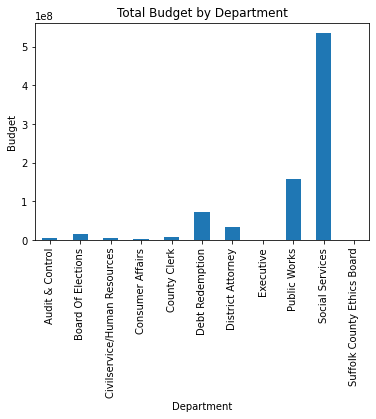

In [7]:
# print the total budget for each department and visualize the result as a bar chart.
# Group by department name and sum the budget for each group
department_budget = df.groupby('department_name')['estimated_2012'].sum()

# Print the result
print(department_budget)

# Visualize the result
department_budget.plot(kind='bar')
plt.title('Total Budget by Department')
plt.xlabel('Department')
plt.ylabel('Budget')
plt.show()

# Comparing estimated budgets to actual budgets

department_name
Audit & Control                        NaN
Board Of Elections                     NaN
Civilservice/Human Resources           NaN
Consumer Affairs                       NaN
County Clerk                           NaN
Debt Redemption                 152.331933
District Attorney                      NaN
Executive                             -inf
Public Works                           NaN
Social Services                        NaN
Suffolk County Ethics Board     -84.671019
Name: budget_diff, dtype: float64


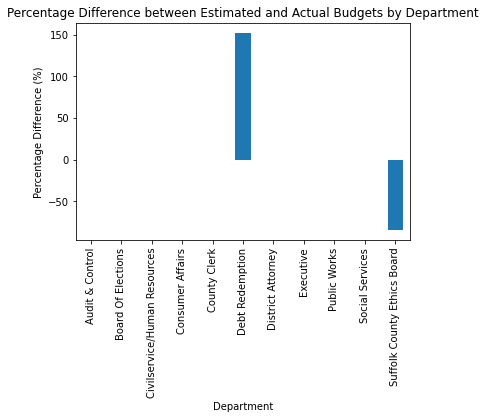

In [8]:
# calculate the percentage difference between the estimated and actual budgets for each object, 
# group the data by department name and calculate the mean percentage difference for each group,
# and visualize the result as a bar chart.

# Calculate the percentage difference between estimated and actual budgets
df['budget_diff'] = (df['actuals_2011'] - df['estimated_2012']) / df['estimated_2012'] * 100

# Group by department name and calculate the mean percentage difference for each group
department_diff = df.groupby('department_name')['budget_diff'].mean()

# Print the result
print(department_diff)

# Visualize the result
department_diff.plot(kind='bar')
plt.title('Percentage Difference between Estimated and Actual Budgets by Department')
plt.xlabel('Department')
plt.ylabel('Percentage Difference (%)')
plt.show()

# Proportion of Budget by Object Code

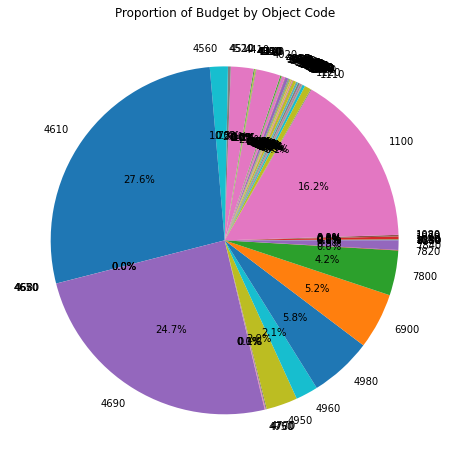

In [9]:
# To calculate the proportion of the budget allocated to each object code, 
# we can use the pandas groupby method and the sum() function to aggregate the actuals_2011 
# column for each object code. We can then plot the results using a pie chart.

# Filter out rows with missing or negative actuals_2011 values
df_filtered = df[df['actuals_2011'] >= 0].dropna(subset=['actuals_2011'])

# Group by object code and sum the actuals_2011 column
object_totals = df_filtered.groupby('object_code')['actuals_2011'].sum()

# Calculate the proportion of the budget for each object code
budget_proportions = object_totals / object_totals.sum()

# produce a pie chart showing the proportion of the budget allocated to each object code.
# Plot a pie chart to visualize the results
plt.figure(figsize=(8, 8))
plt.pie(budget_proportions, labels=budget_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Budget by Object Code')
# plt.legend(loc='best')
plt.show()


# Comparison of Requested, Recommended, and Adopted Appropriations

C:\Users\Owner\anaconda3\envs\RGNY\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


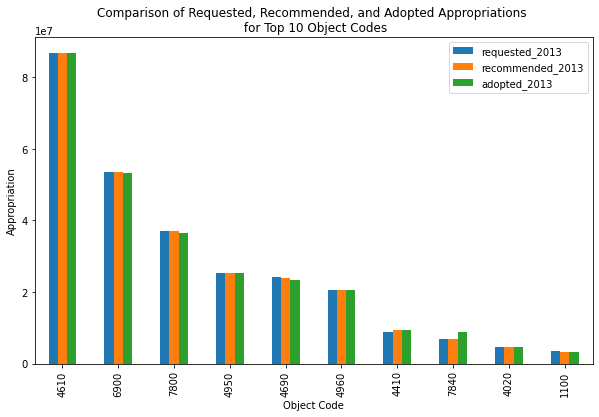

In [10]:
# compare the requested, recommended, and adopted appropriations for each object code, 
# we can use a grouped bar chart. We can group the data by object code and create a 
# bar chart for each column of interest (requested_2013, recommended_2013, and adopted_2013).

# Group by object code and calculate the mean for each column of interest
appropriations = df.groupby('object_code')['requested_2013', 'recommended_2013', 'adopted_2013'].mean()

# Filter the dataframe to only include the top 10 object codes by requested appropriations
top_10 = appropriations.nlargest(10, 'requested_2013')

# Plot a grouped bar chart to visualize the results
top_10.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Requested, Recommended, and Adopted Appropriations \n for Top 10 Object Codes')
plt.xlabel('Object Code')
plt.ylabel('Appropriation')
plt.show()

# Examining Spending Patterns Over Time

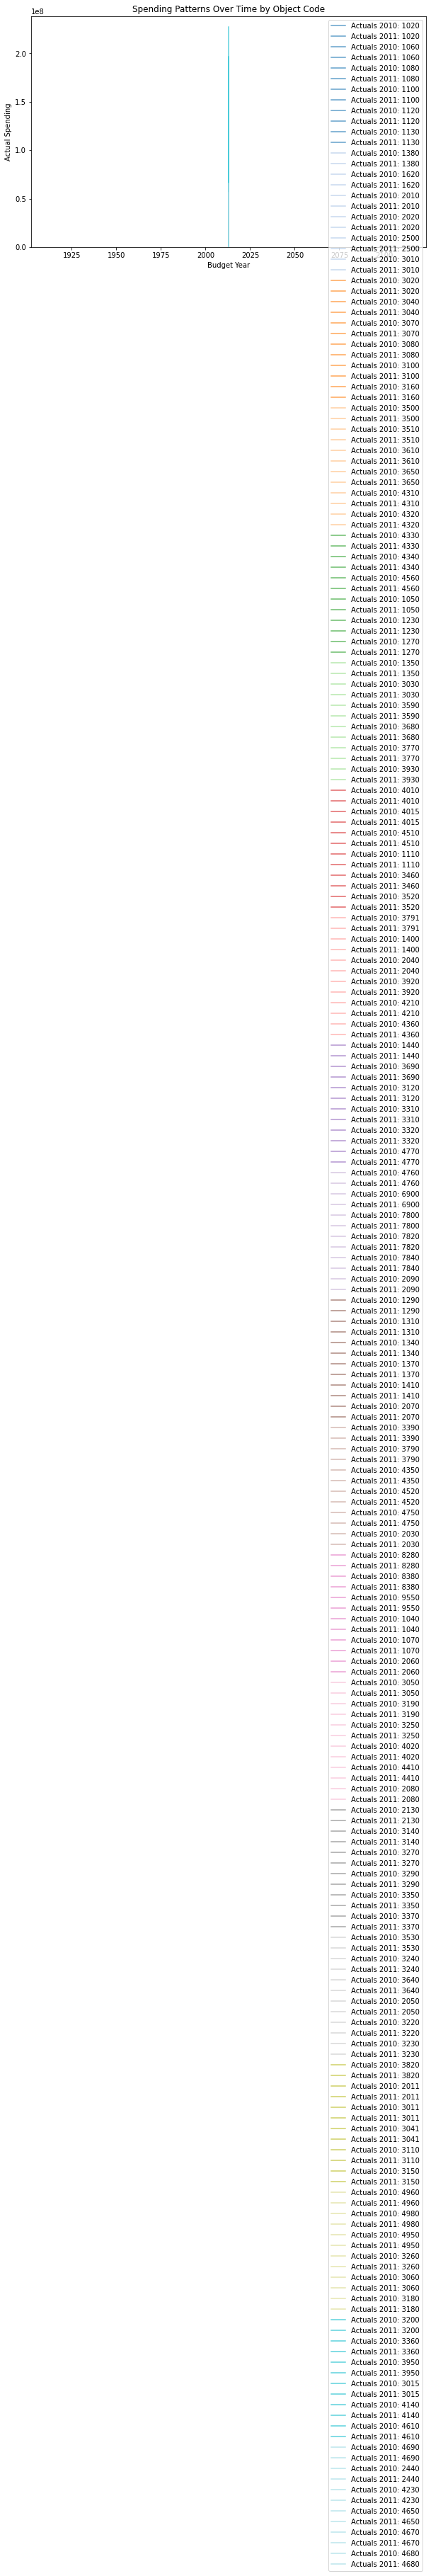

In [11]:
# Get a list of unique object codes
object_codes = df['object_code'].unique()

# Define colors for each object code
colors = plt.cm.tab20(np.linspace(0, 1, len(object_codes)))

# Plot a line chart for each object code
plt.figure(figsize=(10, 6))
for i, code in enumerate(object_codes):
    object_data = df[df['object_code'] == code]
    plt.plot(object_data['budget_year'], object_data['actuals_2010'], 
             color=colors[i], alpha=0.7, label='Actuals 2010: ' + str(code))
    plt.plot(object_data['budget_year'], object_data['actuals_2011'], 
             color=colors[i], alpha=0.7, label='Actuals 2011: ' + str(code))
plt.title('Spending Patterns Over Time by Object Code')
plt.xlabel('Budget Year')
plt.ylabel('Actual Spending')
plt.legend()

# Set y-axis limits
plt.ylim(bottom=0)

plt.show()


# Filtering by Department or Unit

In [12]:
# Filter by department code
dss_df = df.loc[df['department_code'] == 'DSS']
dss_df

,budget_year,department_code,department_name,unit_code,unit_name,object_code,object_name,appropriation_code,actuals_2010,actuals_2011,modified_2012,adopted_2012,estimated_2012,requested_2013,recommended_2013,adopted_2013,budget_diff
671,2013,DSS,Social Services,6004,Soc Svc: Commodities Dist,4980,Contracted Agencies,DE,229209.98,234327.68,222821.0,222821.0,200539.0,203557.0,203557.0,222821.0,16.848932
672,2013,DSS,Social Services,6004,Soc Svc: Commodities Dist,4980,Contracted Agencies,DE,5000.00,0.00,0.0,0.0,0.0,4512.0,0.0,0.0,NaN
673,2013,DSS,Social Services,6004,Soc Svc: Commodities Dist,4980,Contracted Agencies,DE,5000.00,3154.44,4750.0,4750.0,4275.0,4512.0,5000.0,5000.0,-26.211930
674,2013,DSS,Social Services,6004,Soc Svc: Commodities Dist,4980,Contracted Agencies,DE,89824.98,95000.00,90250.0,90250.0,81225.0,63175.0,63175.0,90250.0,16.959064
675,2013,DSS,Social Services,6004,Soc Svc: Commodities Dist,4980,Contracted Agencies,DE,5000.00,0.00,0.0,0.0,0.0,4512.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2013,DSS,Social Services,6141,Dss: Heap,3020,Postage,ME,0.00,800.00,800.0,800.0,800.0,760.0,760.0,760.0,0.000000
996,2013,DSS,Social Services,6141,Dss: Heap,3040,Outside Printing,ME,331.15,200.00,200.0,200.0,200.0,190.0,190.0,190.0,0.000000
997,2013,DSS,Social Services,6141,Dss: Heap,3610,Repairs: Office Equipment,ME,298.00,100.11,500.0,500.0,400.0,380.0,380.0,380.0,-74.972500
998,2013,DSS,Social Services,6141,Dss: Heap,3770,Advertising,ME,0.00,0.00,400.0,400.0,200.0,285.0,285.0,285.0,-100.000000


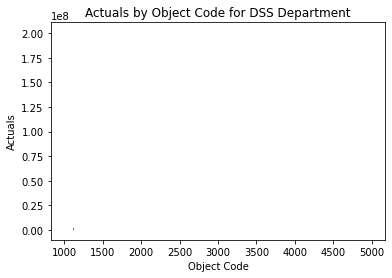

In [13]:
# Group by object code and sum the actuals for each code
dss_actuals = dss_df.groupby('object_code')['actuals_2010'].sum()

# Plot a bar chart of the actuals for each object code
plt.bar(dss_actuals.index, dss_actuals.values)
plt.xlabel('Object Code')
plt.ylabel('Actuals')
plt.title('Actuals by Object Code for DSS Department')
plt.show()

In [14]:
# Filter by unit code
heap_df = df.loc[df['unit_code'] == '6141']
heap_df

,budget_year,department_code,department_name,unit_code,unit_name,object_code,object_name,appropriation_code,actuals_2010,actuals_2011,modified_2012,adopted_2012,estimated_2012,requested_2013,recommended_2013,adopted_2013,budget_diff
